In [23]:
import os
import torch
import data_setup, engine, model_builder, utils,loss_and_accuracy_curve_plotter,data_loader


from torchvision import transforms
from timeit import default_timer as timer 

# Setup hyperparameters
NUM_EPOCHS = 10
BATCH_SIZE = 16
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

In [2]:
# Setup directories
root_dir = "/Users/h6x/ORNL/git/persistence-image-classification/scratch model 1/data/data/tennessee/2018/percentiles/H0H1-3 channels"
annotation_file_path = "/Users/h6x/ORNL/git/persistence-image-classification/scratch model 1/data/data/tennessee/2018/SVI2018 TN counties with death rate HepVu/SVI2018_TN_counties_with_death_rate_HepVu.shp"


In [9]:
# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

In [10]:
# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    annotation_file_path=annotation_file_path,
    root_dir=root_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

In [11]:
model_0 = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

In [12]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

In [13]:
# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

Single image shape: torch.Size([1, 3, 64, 64])



In [14]:
# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    

In [15]:
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Output logits:
tensor([[-0.0179,  0.0025,  0.0002,  0.0133, -0.0211, -0.0349]])

Output prediction probabilities:
tensor([[0.1653, 0.1687, 0.1683, 0.1705, 0.1647, 0.1625]])

Output prediction label:
tensor([3])

Actual label:
1


In [25]:
data_set = data_loader.data_loader_persistence_img(annotation_file_path=annotation_file_path, root_dir=root_dir, transform=data_transform)

In [37]:
data_set[0][0][0].shape

torch.Size([64, 64])

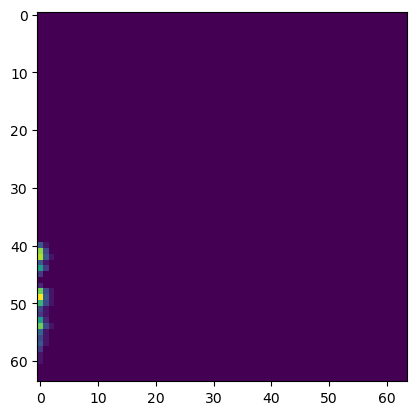

In [36]:
# get single channel from the dataset and plot it using imshow
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(data_set[0][0][0].numpy(), cmap='viridis')

In [1]:
# Npy file extract

In [19]:
#load npy file
import numpy as np
data = np.load('/Users/h6x/ORNL/git/persistence-image-classification/scratch model 1/data/data/tennessee/2018/percentiles/H0H1-3 channels/47001.npy')

In [20]:
data.shape

(57, 57, 3)

In [21]:
# get 50 by 50 channel from each of the 3 channels and plot it using imshow
import matplotlib.pyplot as plt
import numpy as np

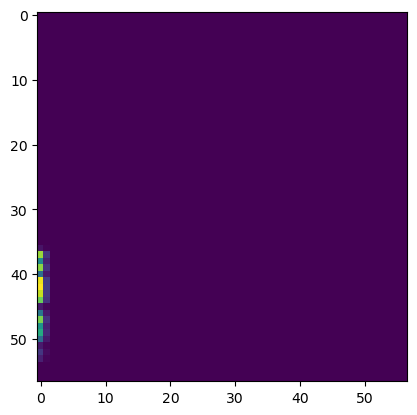

In [33]:
plt.imshow(data[:,:,1], cmap='viridis')

In [34]:
A = data[0:25,0:25,:]

In [37]:
A_ = data[-25:, :25, :]

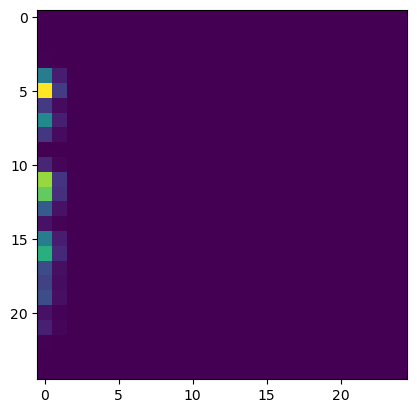

In [38]:
plt.imshow(A_[:,:,0], cmap='viridis')

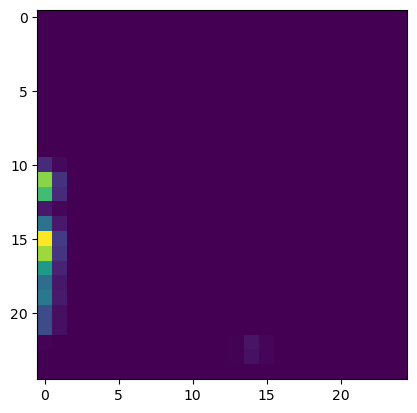

In [51]:
# make A[:,:,0] and RGB image (matrix)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(A_[:,:,0], cmap='viridis')
ax.imshow(A_[:,:,1], cmap='viridis')
ax.imshow(A_[:,:,2], cmap='viridis')
plt.show()



In [39]:
# convert A to PIL image
from PIL import Image
import numpy as np

img = Image.fromarray(A[:,:,0])


In [42]:
# get the shape of the image
img.size

(25, 25)

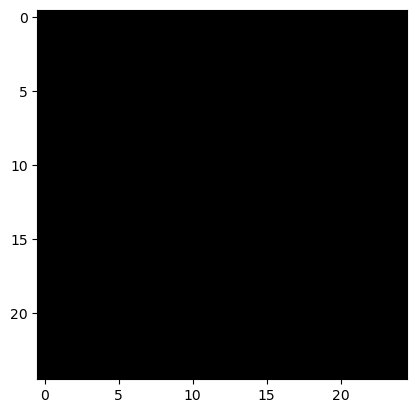

In [43]:
plt.imshow(img, cmap='viridis')

In [1]:
# another test

In [1]:
# import libraries
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import traceback
import pandas as pd


from ripser import Rips
from persim import PersistenceImager

import glob
import pickle
import geopandas as gpd
from tqdm import tqdm

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# /Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/results/persistence images/below 90th percentile/h1/npy 3 channels

# get the directory of npy files in a folder
directory = "/Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/results/persistence images/below 90th percentile/h1/npy 3 channels"

# get the list of npy files in the directory
npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

In [4]:
# load all the npy files in the directory to a list
data = [np.load(os.path.join(directory, f)) for f in npy_files]

In [6]:
data[0].shape

(310, 310, 3)

In [13]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

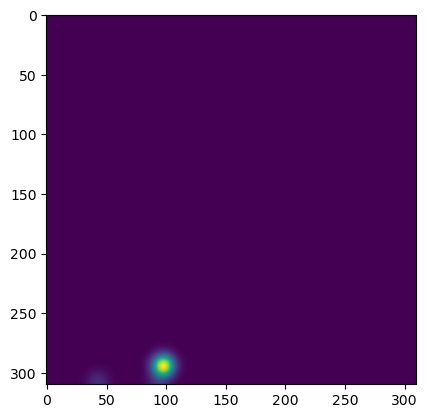

In [21]:
plt.imshow(data[122][:,:,1], cmap='viridis')
plt.show()

In [23]:
# get the highest value in the data and lowest value in the data[122][:,:,1]
np.max(data[122][:,:,1]), np.min(data[122][:,:,1])

(6.1884197339733e-05, -1.715575071976817e-18)

In [25]:
max = np.max(data[122][:,:,1])
min = np.min(data[122][:,:,1])

In [24]:
A = data[122][:,:,1]

In [27]:
# make A matrix range from 0-255
A_RGB = (A - min) / (max - min) * 255

In [28]:
A_RGB

array([[7.06919799e-12, 7.06919799e-12, 7.06919799e-12, ...,
        7.06919799e-12, 7.06919799e-12, 7.06919799e-12],
       [7.06919799e-12, 7.06919799e-12, 7.06919799e-12, ...,
        7.06919799e-12, 7.06919799e-12, 7.06919799e-12],
       [7.06919799e-12, 7.06919799e-12, 7.06919799e-12, ...,
        7.06919799e-12, 7.06919799e-12, 7.06919799e-12],
       ...,
       [3.15258491e-09, 9.08696737e-09, 2.55713833e-08, ...,
        7.06919799e-12, 7.06919799e-12, 7.06919799e-12],
       [3.15378429e-09, 9.09042952e-09, 2.55811309e-08, ...,
        7.06919799e-12, 7.06919799e-12, 7.06919799e-12],
       [3.07742161e-09, 8.86999971e-09, 2.49605141e-08, ...,
        7.06919799e-12, 7.06919799e-12, 7.06919799e-12]])

In [29]:
np.max(A_RGB), np.min(A_RGB)

(255.0, 0.0)

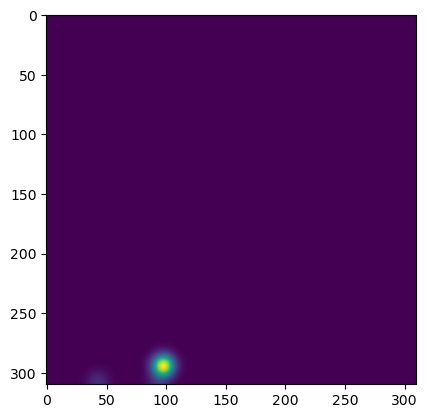

In [30]:
plt.imshow(A_RGB, cmap='viridis')
plt.show()

In [31]:
data[122][:,:].shape

(310, 310, 3)

In [32]:
# each channel get the min and max and make the matrix range from 0-255
A = data[122][:,:,0]
max = np.max(A)
min = np.min(A)
A_RGB = (A - min) / (max - min) * 255

B = data[122][:,:,1]
max = np.max(B)
min = np.min(B)
B_RGB = (B - min) / (max - min) * 255

C = data[122][:,:,2]
max = np.max(C)
min = np.min(C)
C_RGB = (C - min) / (max - min) * 255

# Combine the 3 channels to make the previous single matrix
A_RGB = np.stack((A_RGB, B_RGB, C_RGB), axis=2)

In [33]:
A_RGB.shape

(310, 310, 3)